# “Data cleaning for poverty analysis in Peru (2019)”

* Análisis de la evolución de la pobreza y bienestar de los hogares en Perú utilizando data de ENAHO 2019.

👉 módulo (Enaho01a-2019-500)

* Se usará Python (Pandas, NumPy, Matplotlib, Seaborn) para analizar más de 90 000 registros sobre empleo e ingresos de Perú (2019).

* Se hará una limpieza de datos para manejar valores faltantes, duplicados y valores atípicos, asegurando la integridad de los datos para el análisis.

* Se generará visualizaciones y análisis estadístico para identificar disparidades en los ingresos entre las áreas rurales y urbanas, destacando una brecha significativa de ingresos entre las áreas rurales y rurales.

In [1]:
#Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


📌 Los datos son descargados de la web oficial de ENAHO(Encuesta Nacional de hogares) - INEI (Instituto Nacional de Estadística e Informática) 2019

👉👉 https://www.datosabiertos.gob.pe/dataset/encuesta-nacional-de-hogares-enaho-2019-instituto-nacional-de-estad%C3%ADstica-e-inform%C3%A1tica-inei

📌 Descargar el módulo ingresos y empleo (Enaho01a-2019-500.csv) directo aquí:👇👇

✅ https://github.com/WLozanoH/Peru-Poverty-Analysis-2019/blob/main/Enaho01a-2019-500.zip

In [2]:
#CARGAMOS SOLO LA DATA A ANALIZAR

df = pd.read_csv('Enaho01a-2019-500.csv', sep=',', usecols=['MES','UBIGEO','DOMINIO','ESTRATO',
                                                            'P502','P503','P507','P510','P510A1','P5111','P5116',
                                                            'P51112','P511A','P524A1','OCUPINF','FAC500A'],
                 na_values= ' ')
df.head()

,MES,UBIGEO,DOMINIO,ESTRATO,P502,P503,P507,P510,P510A1,P5111,P5116,P51112,P511A,P524A1,OCUPINF,FAC500A
0,1,10101,4,4,NaN,NaN,2.0,NaN,3.0,0.0,0.0,0.0,NaN,NaN,1.0,73.243919
1,1,10101,4,4,NaN,NaN,5.0,NaN,3.0,0.0,0.0,1.0,7.0,NaN,1.0,111.098007
2,1,10101,4,4,NaN,NaN,2.0,NaN,3.0,0.0,0.0,0.0,NaN,NaN,1.0,73.243919
3,1,10101,4,4,NaN,NaN,3.0,6.0,2.0,1.0,0.0,0.0,2.0,956.0,2.0,111.098007
4,1,10101,4,4,NaN,NaN,3.0,6.0,2.0,1.0,0.0,0.0,7.0,900.0,1.0,93.555817


📌 Renombrando las variables para mejor manipulación de los datos

In [3]:
#Renombrando las variables
df.rename(columns={'P502':'empleo_fijo', 
                   'P503':'negocio_propio',
                   'P507':'ocupacion_principal',
                   'P510':'trabajo_ocup_principal',
                   'P510A1':'registro_sunat',
                   'P5111':'sueldo_ingresos',
                   'P5116':'honorarios_ingresos',
                   'P51112': 'no_recibe_ingresos',
                   'P511A':'tipo_contrato',
                   'P524A1':'ingreso_total',
                   'FAC500A':'fact_expan_ingresos_empleo'}, inplace=True)

In [4]:
#convertir a minuscula todos las variables del dataframe para mejor manipulación
df.columns = df.columns.str.lower()
df.head()

,mes,ubigeo,dominio,estrato,empleo_fijo,negocio_propio,ocupacion_principal,trabajo_ocup_principal,registro_sunat,sueldo_ingresos,honorarios_ingresos,no_recibe_ingresos,tipo_contrato,ingreso_total,ocupinf,fact_expan_ingresos_empleo
0,1,10101,4,4,NaN,NaN,2.0,NaN,3.0,0.0,0.0,0.0,NaN,NaN,1.0,73.243919
1,1,10101,4,4,NaN,NaN,5.0,NaN,3.0,0.0,0.0,1.0,7.0,NaN,1.0,111.098007
2,1,10101,4,4,NaN,NaN,2.0,NaN,3.0,0.0,0.0,0.0,NaN,NaN,1.0,73.243919
3,1,10101,4,4,NaN,NaN,3.0,6.0,2.0,1.0,0.0,0.0,2.0,956.0,2.0,111.098007
4,1,10101,4,4,NaN,NaN,3.0,6.0,2.0,1.0,0.0,0.0,7.0,900.0,1.0,93.555817


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92094 entries, 0 to 92093
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mes                         92094 non-null  int64  
 1   ubigeo                      92094 non-null  int64  
 2   dominio                     92094 non-null  int64  
 3   estrato                     92094 non-null  int64  
 4   empleo_fijo                 29013 non-null  float64
 5   negocio_propio              28166 non-null  float64
 6   ocupacion_principal         69370 non-null  float64
 7   trabajo_ocup_principal      25705 non-null  float64
 8   registro_sunat              62293 non-null  float64
 9   sueldo_ingresos             68997 non-null  float64
 10  honorarios_ingresos         68997 non-null  float64
 11  no_recibe_ingresos          68997 non-null  float64
 12  tipo_contrato               39510 non-null  float64
 13  ingreso_total               261

📌 crear un diccionario para darle nombre a los meses  del año 2022

In [6]:
#crear un diccionario para darle nombre a los meses
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Reemplazar los valores numéricos por los nombres de meses
df['mes'] = df['mes'].map(meses)

#orden de meses
orden_meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto', 
    'Septiembre','Octubre','Noviembre','Diciembre']

#ordenando los meses
df['mes'] = pd.Categorical(df['mes'],
                           categories=orden_meses,
                           ordered=True)

📌 Crear un diccionario para darle nombre a la subclasificación del Dominio Geográfico

In [7]:
#crear un diccionario para Dominio Geográfico, 
# variable = 'DOMINIO' para  almacenar los datos de cada región
dominio_geográfico = {
    1: 'Costa Norte',
    2: 'Costa Centro',
    3: 'Costa Sur',
    4: 'Sierra Norte',
    5: 'Sierra Centro',
    6: 'Sierra Sur',
    7: 'Selva',
    8: 'Lima Metropolitana'
}

#Reemplazar los valores numéricos por los nombres de dominio geográfico
df['dominio'] = df['dominio'].map(dominio_geográfico)


📌 Crear un diccionario para estrato la subclasificación de estrato geográfico - se determina las zonas urbanas y rurales


In [8]:
#Crear un diccionario para estrato geográfico
#Área de Empadronamiento Rural = AER
estrato_geografico = {
    
    1: "500,000 a más", 
    2: "100,000 a 499,999", 
    3: "50,000 a 99,999", 
    4: "20,000 a 49,999",
    5: "2,000 a 19,999", 
    6: "500 a 1,999", 
    7: "AER Compuesto",
    8: "AER Simple"
    
}

df['estrato'] = df['estrato'].map(estrato_geografico)

📌 Analizamos la variable "ESTRATO" para clasificar la muestra en URBANO y RURAL

    'AER' = Área de empadronamiento RURAL

In [9]:
#Creando la variable 'ZONAS' para identificar la muestra urbana y rural
df['zonas'] = df['estrato']
#clasificamos la variable 'urbana' y 'rural' usando lambda
df['zonas'] = df['zonas'].apply(lambda x:'rural' if x == 'AER Simple' or  x == 'AER Compuesto' else 'urbano')

In [10]:
#muetra total para la zona urvana y rural
print(df['zonas'].value_counts())
print('---------------')
#porcentaje de la muetra total para la zona urvana y rural
print(df['zonas'].value_counts()/ df['zonas'].shape[0] *100)

zonas
urbano    63828
rural     28266
Name: count, dtype: int64
---------------
zonas
urbano    69.307447
rural     30.692553
Name: count, dtype: float64


In [11]:
df.head()

,mes,ubigeo,dominio,estrato,empleo_fijo,negocio_propio,ocupacion_principal,trabajo_ocup_principal,registro_sunat,sueldo_ingresos,honorarios_ingresos,no_recibe_ingresos,tipo_contrato,ingreso_total,ocupinf,fact_expan_ingresos_empleo,zonas
0,Enero,10101,Sierra Norte,"20,000 a 49,999",NaN,NaN,2.0,NaN,3.0,0.0,0.0,0.0,NaN,NaN,1.0,73.243919,urbano
1,Enero,10101,Sierra Norte,"20,000 a 49,999",NaN,NaN,5.0,NaN,3.0,0.0,0.0,1.0,7.0,NaN,1.0,111.098007,urbano
2,Enero,10101,Sierra Norte,"20,000 a 49,999",NaN,NaN,2.0,NaN,3.0,0.0,0.0,0.0,NaN,NaN,1.0,73.243919,urbano
3,Enero,10101,Sierra Norte,"20,000 a 49,999",NaN,NaN,3.0,6.0,2.0,1.0,0.0,0.0,2.0,956.0,2.0,111.098007,urbano
4,Enero,10101,Sierra Norte,"20,000 a 49,999",NaN,NaN,3.0,6.0,2.0,1.0,0.0,0.0,7.0,900.0,1.0,93.555817,urbano


📌 Analizar valores nulos, duplicados y únicos

In [12]:
#verificando valores nulos
total_valores_nulos = df.isnull().sum()
porcentaje_valores_nulos = (total_valores_nulos/len(df)) *100

#creamos un dataframe para mostrar solo resultados nulos
resultado_nulos = pd.DataFrame({'total_nulos':total_valores_nulos,'Porcentaje Nulos(%)':porcentaje_valores_nulos})
print(resultado_nulos)



                            total_nulos  Porcentaje Nulos(%)
mes                                   0             0.000000
ubigeo                                0             0.000000
dominio                               0             0.000000
estrato                               0             0.000000
empleo_fijo                       63081            68.496319
negocio_propio                    63928            69.416031
ocupacion_principal               22724            24.674789
trabajo_ocup_principal            66389            72.088301
registro_sunat                    29801            32.359329
sueldo_ingresos                   23097            25.079810
honorarios_ingresos               23097            25.079810
no_recibe_ingresos                23097            25.079810
tipo_contrato                     52584            57.098182
ingreso_total                     65948            71.609443
ocupinf                           27140            29.469889
fact_expan_ingresos_empl

# Analizando y completando valores nulos para cada variable

📌 Análisis de 'empleo_fijo' = tiene empleo fijo o no

In [13]:
#Análisis de variable 'empleo_fijo':
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['empleo_fijo'].fillna('missing value', inplace=True)
#reemplazar valores en 'empleo fijo': 1:empleo fijo, 0: no empleo fijo, desconocido : desconocido
df['empleo_fijo'] = df['empleo_fijo'].replace({1.0: 1, 2.0: 0})


In [14]:
#mapeamos empleo fijo
empleofijo = {
    
    1:'tiene',
    0: 'no tiene',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'empleo_fijo'
df['empleo_fijo'] = df['empleo_fijo'].map(empleofijo)

In [15]:
#revisamos valores en:
df['empleo_fijo'].value_counts()

empleo_fijo
missing value    63081
no tiene         28166
tiene              847
Name: count, dtype: int64

📌 Análisis de 'negocio_propio' = tiene negocio propio o no

In [16]:
#Análisis de variable 'negocio_propio':
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['negocio_propio'].fillna('missing value', inplace=True)
#reemplazar valores en 'empleo fijo': 1:negocio propio, 0: no negocio propio, desconocido : desconocido
df['negocio_propio'] = df['negocio_propio'].replace({1.0: 1, 2.0: 0})

In [17]:
#mapeamos negocio_propio
negociopropio = {
    
    1:'tiene',
    0: 'no tiene',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'empleo_fijo'
df['negocio_propio'] = df['negocio_propio'].map(negociopropio)

In [18]:
#revisamos valores en:
df['negocio_propio'].value_counts()

negocio_propio
missing value    63928
no tiene         27752
tiene              414
Name: count, dtype: int64

📌 Análisis de 'ocupacion_principal'

In [19]:
#Análisis de variable 'ocupacion_principal':
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['ocupacion_principal'].fillna('missing value', inplace=True)
#reemplazar valores en 'ocupacion_principal': 
df['ocupacion_principal'] = df['ocupacion_principal'].replace({1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7 })

In [20]:
ocupaciones = {
    
    1:'empleador',
    2:'independiente',
    3: 'empleado',
    4: 'obrero',
    5: 'no remunerado',
    6: 'trab. hogar',
    7: 'otro',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'ocupacion_principal'
df['ocupacion_principal'] = df['ocupacion_principal'].map(ocupaciones)

In [21]:
#revisamos valores en:
df['ocupacion_principal'].value_counts()

ocupacion_principal
independiente    26806
missing value    22724
empleado         13251
no remunerado    12973
obrero           12182
empleador         2681
trab. hogar       1205
otro               272
Name: count, dtype: int64

📌 Análisis de trabajo en su ocupación principal = 'trabajo_ocup_principal'

In [22]:
#Análisis de variable 'trabajo_ocup_principal':
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['trabajo_ocup_principal'].fillna('missing value', inplace=True)
#reemplazar valores en 'trabajo_ocup_principal':
df['trabajo_ocup_principal'] = df['trabajo_ocup_principal'].replace({1.0: 1, 2.0: 2, 3.0: 3, 5.0: 4, 6.0: 5, 7.0: 6 })

In [23]:
trabajos = {
    
    1:'f.a, pnp, etc',
    2:'administración Pública',
    3: 'empresa pública',
    4: 'service',
    5: 'empresa privada',
    6: 'otra',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'trabajo_ocup_principal'
df['trabajo_ocup_principal'] = df['trabajo_ocup_principal'].map(trabajos)

In [24]:
#reemplazamos empresa pública en administración Pública, dado que abarca un mismo grupo
df['trabajo_ocup_principal'] = df['trabajo_ocup_principal'].replace({'empresa pública':'administración Pública'})

In [25]:
#revisamos valores en:
df['trabajo_ocup_principal'].value_counts()

trabajo_ocup_principal
missing value             66389
empresa privada           19297
administración Pública     5499
service                     536
f.a, pnp, etc               373
Name: count, dtype: int64

📌 Análisis de 'registro_sunat' = si la empresa donde labora está o no registrada en SUNAT

In [26]:
#Análisis de variable 'trabajo_ocup_principal':
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['registro_sunat'].fillna('missing value', inplace=True)

#reemplazar valores en 'registro_sunat':
df['registro_sunat'] = df['registro_sunat'].replace({1.0: 1, 2.0: 2, 3.0: 3})

In [27]:
#crear un diccionario para mapear datos de

registros_sunat = {
    
    1:'persona jurídica',
    2:'persona natural',
    3: 'no está registrado',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'registro_sunat'
df['registro_sunat'] = df['registro_sunat'].map(registros_sunat)

In [28]:
#revisamos valores en:
df['registro_sunat'].value_counts()

registro_sunat
no está registrado    45287
missing value         29801
persona jurídica       9418
persona natural        7588
Name: count, dtype: int64

📌 Analizamos la variable 'sueldo_ingresos' = si la persona recibe un sueldo como ingresos o no

In [29]:
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['sueldo_ingresos'].fillna('missing value', inplace=True)

#reemplazar valores en 'sueldo_ingresos': 1:si tiene sueldo, 0: no tiene sueldo, desconocido : desconocido
df['sueldo_ingresos'] = df['sueldo_ingresos'].replace({1.0: 1, 0.0: 0})

In [30]:
#mapeo de la variable 'sueldo_ingresos':
sueldos = {
    
    1: 'si recibe',
    0: 'otro',
    'missing value':'missing value'
    
}

#reemplazamos los valores en la variable 'sueldo_ingresos'
df['sueldo_ingresos'] = df['sueldo_ingresos'].map(sueldos)

In [31]:
#revisamos valores en:
df['sueldo_ingresos'].value_counts()

sueldo_ingresos
otro             55442
missing value    23097
si recibe        13555
Name: count, dtype: int64

📌 Analisis de la variable 'honorarios_ingresos' = si una persona obtiene ingresos por honorarios profesionales o no

In [32]:
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['honorarios_ingresos'].fillna('missing value', inplace=True)

#reemplazar valores en 'honorarios_ingresos': 1:si , 0: no , desconocido : desconocido
df['honorarios_ingresos'] = df['honorarios_ingresos'].replace({1.0: 1, 0.0: 0})

In [33]:
#mapeo de la variable 'honorarios_ingresos':
honorarios = {
    
    1: 'si recibe',
    0: 'otro',
    'missing value':'missing value'
    
}

#reemplazamos los valores en la variable 'honorarios_ingresos'
df['honorarios_ingresos'] = df['honorarios_ingresos'].map(honorarios)

In [34]:
#revisamos valores en:
df['honorarios_ingresos'].value_counts()

honorarios_ingresos
otro             68620
missing value    23097
si recibe          377
Name: count, dtype: int64

📌 Análisis de la variable 'no_recibe_ingresos' , las personas que a pesar que tienen una ocupación principal, no perciben ningún ingreso

In [35]:
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['no_recibe_ingresos'].fillna('missing value', inplace=True)

#reemplazar valores en 'honorarios_ingresos': 1: no recibe , 0: otro , desconocido : desconocido
df['no_recibe_ingresos'] = df['no_recibe_ingresos'].replace({1.0: 1, 0.0: 0})

In [36]:
#mapeo de la variable 'no_recibe_ingresos':
no_ingresos = {
    
    1: 'no recibe ingresos',
    0: 'otro',
    'missing value':'missing value'
    
}

#reemplazamos los valores en la variable 'no_recibe_ingresos'
df['no_recibe_ingresos'] = df['no_recibe_ingresos'].map(no_ingresos)

In [37]:
#revisamos valores en:
df['no_recibe_ingresos'].value_counts()

no_recibe_ingresos
otro                  55825
missing value         23097
no recibe ingresos    13172
Name: count, dtype: int64

📌 Análisis de la variable 'tipo_contrato' = el tipo de contrato que tiene la persona donde está laborando

In [38]:
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['tipo_contrato'].fillna('missing value', inplace=True)

#reemplazar valores en 'honorarios_ingresos': 1: no recibe , 0: otro , desconocido : desconocido
df['tipo_contrato'] = df['tipo_contrato'].replace({1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7 })

5. Contrato por locación de servicios (Honorarios profesionales, RUC), SNP

6. Regimen Especial de Contratación Administrativa (CAS)

In [39]:
#mapeando valores para 'tipo_contrato'
tipos_contratos = {
    
    1:'indefinido',
    2:'plazo fijo',
    3: 'periodo. prueba',
    4: 'prácticas',
    5: 'locación',
    6: 'cas',
    7: 'otro',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'tipo_contrato'
df['tipo_contrato'] = df['tipo_contrato'].map(tipos_contratos)

In [40]:
#revisamos valores en:
df['tipo_contrato'].value_counts()

tipo_contrato
missing value      52584
otro               25812
plazo fijo          6919
indefinido          4325
locación            1640
cas                  608
prácticas            166
periodo. prueba       40
Name: count, dtype: int64

📌 Análisis de la variable 'ingreso_total' == la cantidad total de ingresos que percibe una persona en este set de datos

In [41]:
## creamos el missing value '999999' por 'nan' para evitar problemas en el cálculo estadístico
df['ingreso_total'].replace(999999, np.nan, inplace=True)

In [42]:
df['ingreso_total'].describe()

count    26146.000000
mean      1197.060698
std       1382.860400
min          4.000000
25%        250.000000
50%        900.000000
75%       1680.000000
max      25000.000000
Name: ingreso_total, dtype: float64

📌 Completando los valores nulos para 'ingreso_total' dado que La mediana es la técnica más robusta frente a outliers, observamos que nuestro dataset contiene valores extremos (ingresos muy altos(max): '25000' o bajos(min):'4'), la mediana es una mejor medida de tendencia central.

📌 completar los valores nulos en la variable 'ingreso_total' usando la mediana de acuerdo a la zona (urbano o rural)

In [43]:
# Agrupar por la columna 'zona' (urbano/rural) y calcular la mediana para cada grupo
mediana_por_zona = df.groupby('zonas')['ingreso_total'].median()

# Crear una función que complete los valores nulos con la mediana correspondiente a la zona
def completar_valores_nulos(row):
    if pd.isnull(row['ingreso_total']):
        return mediana_por_zona[row['zonas']]
    else:
        return row['ingreso_total']
    
# Aplicar la función fila por fila usando 'apply'
df['ingreso_total'] = df.apply(completar_valores_nulos, axis=1)

In [44]:
# Verificar si los valores nulos han sido reemplazados
df['ingreso_total'].isnull().sum()

0

📌 Análisis de la variable 'ocupinf' == situación de informalidad en su ocupación principal

        1 == empleo formal
        2 == empleo informal

In [45]:
## creamos un nueva categoría "Desconocido" para guardar los valores nulos
df['ocupinf'].fillna('missing value', inplace=True)

#reemplazar valores en 'honorarios_ingresos': 1: no recibe , 0: otro , desconocido : desconocido
df['ocupinf'] = df['ocupinf'].replace({1.0: 1, 2.0: 2})

In [46]:
#mapeando valores para 'ocupinf'
situación_ocupacion = {
    
    1:'empleo formal',
    2:'empleo informal',
    'missing value': 'missing value'
}

#reemplazamos los valores en la variable 'ocupinf'
df['ocupinf'] = df['ocupinf'].map(situación_ocupacion)

In [47]:
df['ocupinf'].value_counts()

ocupinf
empleo formal      50220
missing value      27140
empleo informal    14734
Name: count, dtype: int64

🎯 Valores

        * 'empleo_fijo'(3): 1: si, 0: no, desconocido
        * 'negocio_propio'(3): 1: si, 0: no, desconocido
        * 'ocupación_principal'(8)
        * 'trabajo_ocup_principal'(7)
        * 'registro_sunat'(3)
        * 'sueldo_ingresos'(3): 1: si, 0: otro, desconocido
        * 'honorarios_ingresos'(3) 1: si, 0: otro, desconocido
        * 'no_recibe_ingreso':(3) 1: no recibe, 0: otro, desconocido
        * 'tipo_contrato'(8)
        * 'ingreso_total': variable a analizar para calculo de la pobreza
        * 'ocupinf'(3)


# VERIFICAR VALORES DUPLICADOS

In [48]:
#verificar valores duplicados
print(df.duplicated().sum())
print('--------------')
print(df.duplicated().sum().max())

19696
--------------
19696


In [49]:
#Eliminando filas duplicadas
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(92094, 17)
(72398, 17)


In [50]:
df.info()
#Index: 79721 entries, 0 to 87659

<class 'pandas.core.frame.DataFrame'>
Index: 72398 entries, 0 to 92093
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   mes                         72398 non-null  category
 1   ubigeo                      72398 non-null  int64   
 2   dominio                     72398 non-null  object  
 3   estrato                     72398 non-null  object  
 4   empleo_fijo                 72398 non-null  object  
 5   negocio_propio              72398 non-null  object  
 6   ocupacion_principal         72398 non-null  object  
 7   trabajo_ocup_principal      72398 non-null  object  
 8   registro_sunat              72398 non-null  object  
 9   sueldo_ingresos             72398 non-null  object  
 10  honorarios_ingresos         72398 non-null  object  
 11  no_recibe_ingresos          72398 non-null  object  
 12  tipo_contrato               72398 non-null  object  
 13  ingreso_total        

In [51]:
#tipo de contrato tiene un valor nulo, por lo que se elimina
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(72398, 17)
(72398, 17)


In [52]:
df.info()
#Index: 79720 entries, 0 to 87659

<class 'pandas.core.frame.DataFrame'>
Index: 72398 entries, 0 to 92093
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   mes                         72398 non-null  category
 1   ubigeo                      72398 non-null  int64   
 2   dominio                     72398 non-null  object  
 3   estrato                     72398 non-null  object  
 4   empleo_fijo                 72398 non-null  object  
 5   negocio_propio              72398 non-null  object  
 6   ocupacion_principal         72398 non-null  object  
 7   trabajo_ocup_principal      72398 non-null  object  
 8   registro_sunat              72398 non-null  object  
 9   sueldo_ingresos             72398 non-null  object  
 10  honorarios_ingresos         72398 non-null  object  
 11  no_recibe_ingresos          72398 non-null  object  
 12  tipo_contrato               72398 non-null  object  
 13  ingreso_total        

📌 verificando subniveles en variables categóricas

In [53]:
#filtrando las variables categóricas
cols_cat = df.select_dtypes(include='object')
#verificando subniveles en variables categóricas
for i, col in enumerate(cols_cat):
    print(f'{col}: {cols_cat[col].nunique()} subniveles')

dominio: 8 subniveles
estrato: 8 subniveles
empleo_fijo: 3 subniveles
negocio_propio: 3 subniveles
ocupacion_principal: 8 subniveles
trabajo_ocup_principal: 5 subniveles
registro_sunat: 4 subniveles
sueldo_ingresos: 3 subniveles
honorarios_ingresos: 3 subniveles
no_recibe_ingresos: 3 subniveles
tipo_contrato: 8 subniveles
ocupinf: 3 subniveles
zonas: 2 subniveles


In [54]:
#verificando un solo valor en variables numericas
df.describe()

,ubigeo,ingreso_total,fact_expan_ingresos_empleo
count,72398.000000,72398.000000,72398.000000
mean,132316.707243,891.182174,277.395729
std,66892.378062,900.242193,272.365116
min,10101.000000,4.000000,1.914451
25%,80205.000000,250.000000,106.267952
50%,140118.000000,950.000000,192.636780
75%,180301.000000,950.000000,337.153381
max,250401.000000,25000.000000,2210.281982


📌 graficando la variable 'ingreso_total' para verificar la distribución de los datos

Text(0.5, 0, 'Ingreso total mensual')

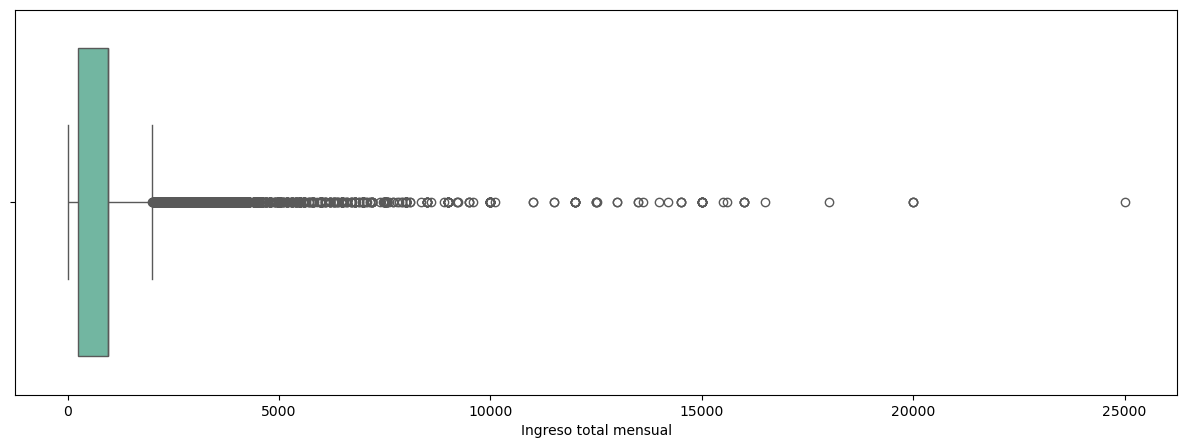

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(x='ingreso_total', data=df, palette = 'Set2')
plt.xlabel('Ingreso total mensual')


📌 Analizamos las variables categóricas 

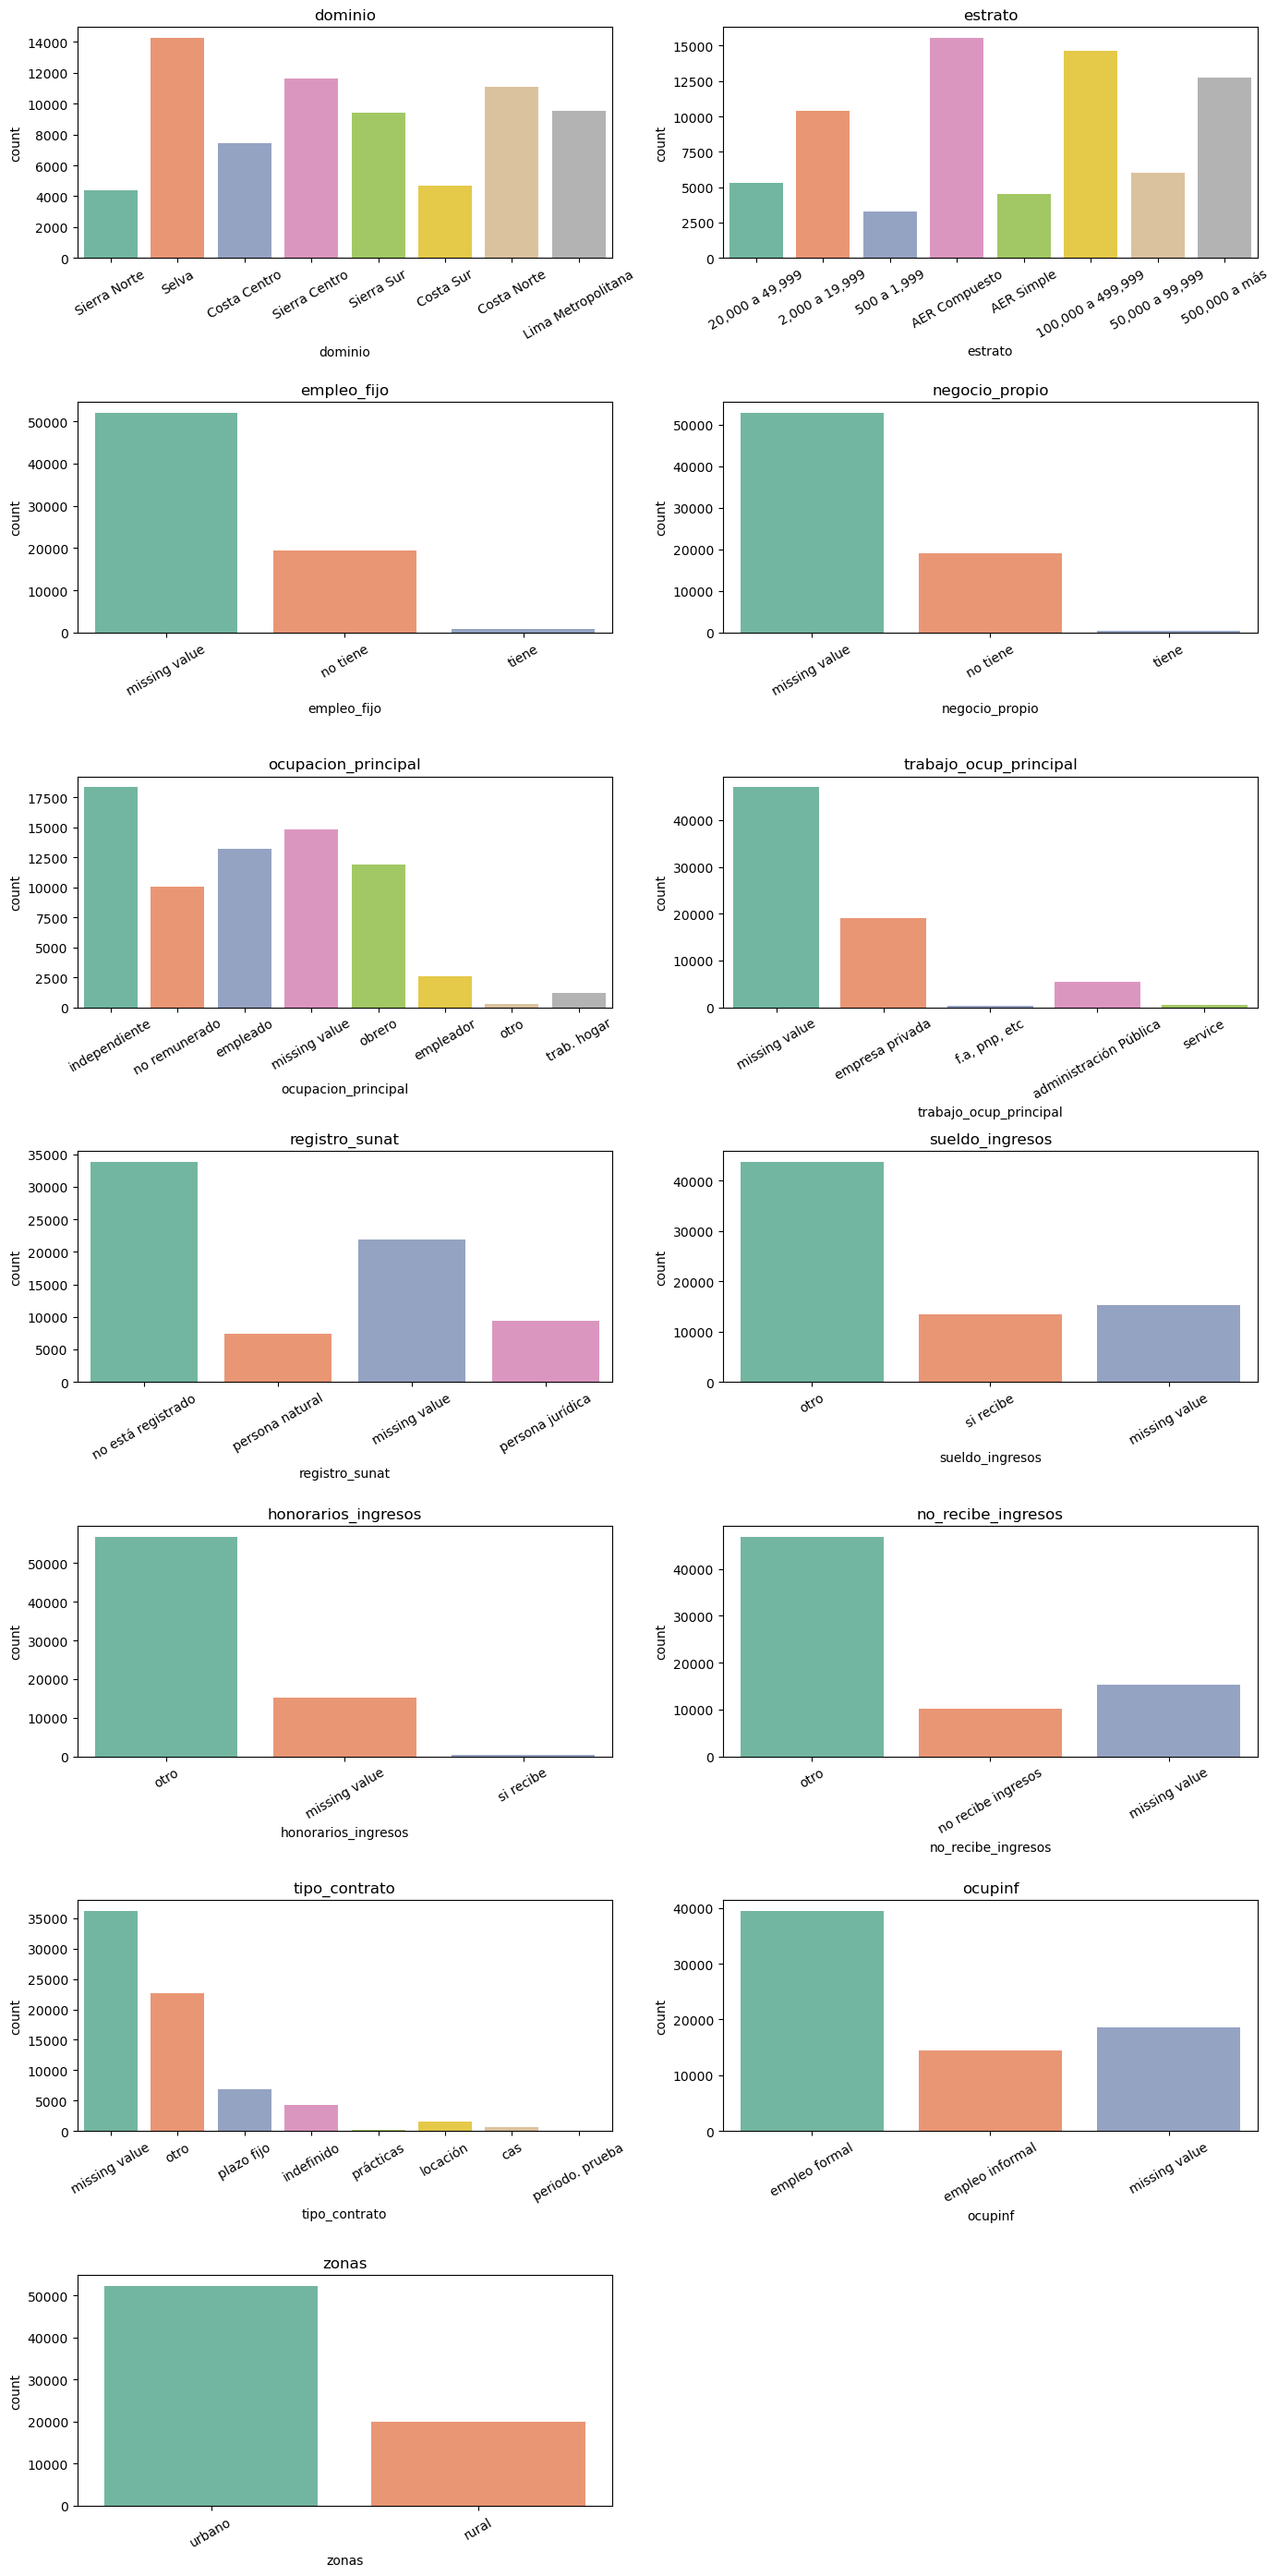

In [56]:
#seleccionamos solo las variables categóricas
cols_cat = df.select_dtypes(include=['object'])

# Definimos el número de filas y columnas de acuerdo con el número de variables categóricas
num_vars = len(cols_cat.columns)
num_rows = (num_vars // 2) + (num_vars % 2)  # Dos gráficos por fila

# Creamos los subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, num_rows * 4))
fig.subplots_adjust(hspace=0.5)

# Aplanamos el array de axes en caso de que haya más de 1 fila/columna
axes = axes.flatten()

# Recorremos las columnas categóricas y graficamos
for i, col in enumerate(cols_cat.columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)

# Si hay más subplots de los necesarios, los desactivamos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustamos la visualización
plt.tight_layout()
plt.show()

🎯 verificamos el promedio de ingresos por zona

In [57]:
df.groupby(df['zonas'])['ingreso_total'].mean()

zonas
rural      317.376874
urbano    1111.306278
Name: ingreso_total, dtype: float64

In [58]:
df.head()

,mes,ubigeo,dominio,estrato,empleo_fijo,negocio_propio,ocupacion_principal,trabajo_ocup_principal,registro_sunat,sueldo_ingresos,honorarios_ingresos,no_recibe_ingresos,tipo_contrato,ingreso_total,ocupinf,fact_expan_ingresos_empleo,zonas
0,Enero,10101,Sierra Norte,"20,000 a 49,999",missing value,missing value,independiente,missing value,no está registrado,otro,otro,otro,missing value,950.0,empleo formal,73.243919,urbano
1,Enero,10101,Sierra Norte,"20,000 a 49,999",missing value,missing value,no remunerado,missing value,no está registrado,otro,otro,no recibe ingresos,otro,950.0,empleo formal,111.098007,urbano
3,Enero,10101,Sierra Norte,"20,000 a 49,999",missing value,missing value,empleado,empresa privada,persona natural,si recibe,otro,otro,plazo fijo,956.0,empleo informal,111.098007,urbano
4,Enero,10101,Sierra Norte,"20,000 a 49,999",missing value,missing value,empleado,empresa privada,persona natural,si recibe,otro,otro,otro,900.0,empleo formal,93.555817,urbano
5,Enero,10101,Sierra Norte,"20,000 a 49,999",no tiene,no tiene,missing value,missing value,missing value,missing value,missing value,missing value,missing value,950.0,missing value,111.098007,urbano


* RESUMEN

✅ Limpieza de Datos:

    📌 Se eliminaron 19,696 filas duplicadas, quedando con 72,398 registros.

    📌 Se eliminó un valor nulo en la columna tipo_contrato, dejando el conjunto sin valores nulos.

✅ Análisis de Variables:

    📌 Las variables categóricas tienen entre 2 y 8 subniveles, con amplia diversidad en dominio, estrato y tipo_contrato.

    📌 La variable ingreso_total presenta valores atípicos con una media de 891.18 y un máximo de 25,000.

✅ Visualización:

    📌 Se usaron gráficos para observar la dispersión de ingreso_total y la distribución de cada variable categórica.

✅ Ingreso por Zona:

    📌En promedio, los ingresos en zonas rurales son de 317.38, mientras que en zonas urbanas alcanzan los 1,111.31, evidenciando una fuerte disparidad.

* Resumen de habilidades usadas:

✅ *1. Calidad de Datos:* Se Identificó y eliminó duplicados y valores nulos, asegurando precisión en el análisis.

✅ *2. Análisis Detallado:* Se Exploró y resumió tanto variables categóricas como numéricas, mostrando habilidad para identificar patrones clave.

✅ *3. Visualización Efectiva:* Se usó gráficos para detectar valores atípicos y comunicar tendencias complejas, facilitando la interpretación de datos.

✅ *4. Agrupación y Comparación:* Al calcular promedios de ingreso por zona, se resaltó desigualdades significativas, destacando capacidad de análisis comparativo.

✅ *5. Insights Clave:* El enfoque en la disparidad de ingresos rurales y urbanos demuestra pensamiento crítico orientado a resultados útiles en un contexto socioeconómico.

🎯 Elije la ruta donde vas a guardar tu data

In [59]:
#guardamos la data para pasar al análisis exploratorio
ruta = ('C:\\Users\\LENOVO\\Desktop\\Projects\\Peru-Poverty-2019\\data2019-500-limpia.csv')

df.to_csv(ruta,index=False)